# Lesson 2 - Phugoid Oscillation

When an aircraft is initially moving on the straight-line phugoid ($C=\frac{2}{3}$, $\cos\theta=1$, $z=z_t$), it experiences a small upset and a wind gust slightly perturbs its. It will then enter into a gentle oscillation around the previous straight-line path - _phugoid oscillation_.

The equation for the phugoid oscillation is a 2nd-order, ODE: 

$$ \begin{equation}
z(t)'' + \frac{g \,z(t)}{z_t}=g
\end{equation} $$

Two 1st-order equations:
    $$ \begin{eqnarray}
    z'(t) &=& b(t)\\
    b'(t) &=& g\left(1-\frac{z(t)}{z_t}\right)
    \end{eqnarray} $$

Vector with two independent variables:
    $$ \begin{equation}
    \vec{u} = \begin{pmatrix} z\\ b \end{pmatrix}
    \end{equation} $$
    
and as a single vector equation:
    $$ \begin{equation}
    \vec{u}  ' (t) = \begin{pmatrix} b\\ g-g\frac{z(t)}{z_t} \end{pmatrix}
    \end{equation} $$

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [3]:
# Time Grid using linspace()
T = 100.0   # final time or length of the time-interval
dt = 0.02   # time-step size
N = int(T/dt) + 1   # number of time steps needed to reach the final time
t = numpy.linspace(0.0, T, num=N)   # time grid
print(t)

[0.000e+00 2.000e-02 4.000e-02 ... 9.996e+01 9.998e+01 1.000e+02]


In [4]:
# Time Grid using arange()
T_arange = 100.0
dt_arange = 0.02
t_arange = numpy.arange(0.0, T_arange + 0.5 *dt, dt)
print(t_arange)

[0.000e+00 2.000e-02 4.000e-02 ... 9.996e+01 9.998e+01 1.000e+02]


### Euler's Method

$$ \begin{equation}
u_{n+1} = u_n + \Delta t \,f(u_n)
\end{equation} $$

where $u_n$ is the approximate solution at time $t_n$

For the equations of the phugoid oscillation:
$$ \begin{align}
z_{n+1} &= z_n + \Delta t \, b_n \\
b_{n+1} &= b_n + \Delta t \left(g - \frac{g}{z_t} \, z_n \right)
\end{align} $$

In [5]:
# Initial Conditions
z0 = 100.0   # altitude
b0 = 10.0   # upward velocity resulting from gust
zt = 100.0   # trimp altitude
g = 9.81   # acceleration due to gravity

# Initial value of the numerical solution
u = numpy.array([z0, b0])

# Array to store the elevation value at each time step
z = numpy.zeros(N)
z[0] = z0

# Temporal integration using Euler's Method
for n in range(1, N):
    rhs = numpy.array([u[1], g * (1 - u[0] / zt)])
    u = u + dt * rhs
    z[n] = u[0]

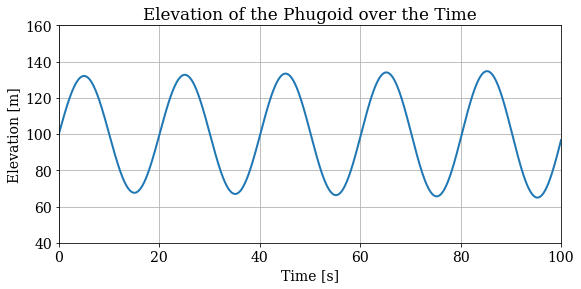

In [6]:
# Font family and size for Matplot figures
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 14

# Plot of the numerical Solution of the elevation
pyplot.figure(figsize = (9.0, 4.0))  # size of the figure
pyplot.title('Elevation of the Phugoid over the Time') # title
pyplot.xlabel('Time [s]') # x-axis label
pyplot.ylabel('Elevation [m]') # y-axis label
pyplot.xlim(t[0], t[-1]) # x-axis limits
pyplot.ylim(40.0, 160.0) # y-axis limits
pyplot.grid() # background grid to improve readability
pyplot.plot(t, z, color = 'C0', linestyle = '-', linewidth = 2);


### Exact Solution

Equation for phugoid oscilations, a 2nd-order, linear ODE

$$\begin{equation}
z(t) = A \sin \left(\sqrt{\frac{g}{z_t}} t \right) + B \cos \left (\sqrt{\frac{g}{z_t}} t \right) + z_t
\end{equation} $$

where A and B are constants
   
Letting initial conditions:
$$ \begin{eqnarray}
z(0) = z_0 \\
b(0) = b_0
\end{eqnarray} $$

So...

$$ \begin{equation}
z(t) = b_0 \sqrt{\frac{z_t}{g}} \sin \left (\sqrt{\frac{g}{z_t}} t \right) + (z_0-z_t) \cos \left (\sqrt{\frac{g}{z_t}} t \right) + z_t
\end{equation} $$

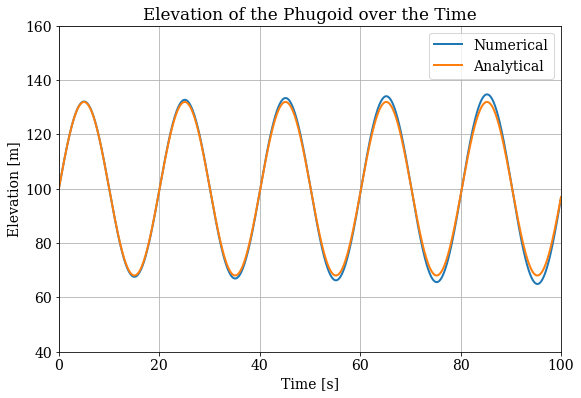

In [7]:
# Exact solution
z_exact = (b0 * (zt / g)**0.5 * numpy.sin((g / zt)**0.5 * t) +
           (z0 - zt) * numpy.cos((g / zt)**0.5 * t) + zt)

# Plot of both numerical solution and exact solution
pyplot.figure(figsize = (9.0, 6.0))  # size of the figure
pyplot.title('Elevation of the Phugoid over the Time') # title
pyplot.xlabel('Time [s]') # x-axis label
pyplot.ylabel('Elevation [m]') # y-axis label
pyplot.xlim(t[0], t[-1]) # x-axis limits
pyplot.ylim(40.0, 160.0) # y-axis limits
pyplot.grid() # background grid to improve readability
pyplot.plot(t, z, label = 'Numerical', color = 'C0', 
            linestyle = '-', linewidth = 2)
pyplot.plot(t, z_exact, label = 'Analytical', color = 'C1',
            linestyle = '-', linewidth = 2)
pyplot.legend(); # legend


## Convergence

**norm** of the difference, like $L_1$ norm:
$$ E = \Delta t \sum_{n=0} ^N \left |z(t_n) - z_n\right|$$

which is the sum. of the individual differences between the exact and the numerical solutions, at each mesh point

ie. **E** is the discrete representation of the integral over the interval $T$ of the (absolute) difference between the computer $z$ and $z_{\rm exact}$:
$$ E = \int \vert  z-z_\rm{exact} \vert dt $$

Check for convergence: calculate the numerical solution using progressively smaller vlaues of dt

In [8]:
# time-increment array
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001, 0.0001])

# array that will contain solution of each grid
z_values = numpy.empty_like(dt_values, dtype = numpy.ndarray)

for i, dr in enumerate(dt_values):
    N = int(T/dt) + 1  # number of time-steps
    t = numpy.linspace(0.0, T, N)  # to discretize the time using numpy.linspace
    
    # initial conditions
    u = numpy.array([z0, b0])
    z = numpy.empty_like(t)
    z[0] = z0
    
    # time loop using Euler method
    for n in range(1,N):
        u = u + dt * numpy.array([u[1], g*(1-u[0]/zt)])
        # store the elevation at time-step n+1
        z[n] = u[0]
    
    # store the total elevation calculation grid i
    z_values[i] = z.copy()

## Calculate the Error

In [9]:
def get_error(z, dt):
    # z - array of float, numerical solution
    # dt - float, time increment
    # returns: err - float, L_1 norm of the error with respect to the exact solution
    
    N = len(z)
    t = numpy.linspace(0.0, T, N)
    
    z_exact = b0 * (zt/g) ** 0.5 * numpy.sin((g/zt) ** 0.5 * t) + \
                (z0-zt) * numpy.cos((g/zt) ** 0.5 * t) + zt
        
    return dt * numpy.sum(numpy.abs(z - z_exact))

$$ z-z_\rm{exact} $$

array operation, to take the difference between elements at each corresponding index in both arrays


Iterate through each $\Delta t$ value and then calculate the corresponding error.

In [10]:
error_values = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    # using the function above get_error()
    error_values[i] = get_error(z_values[i], dt)

### Plot of $\Delta t$ vs. error

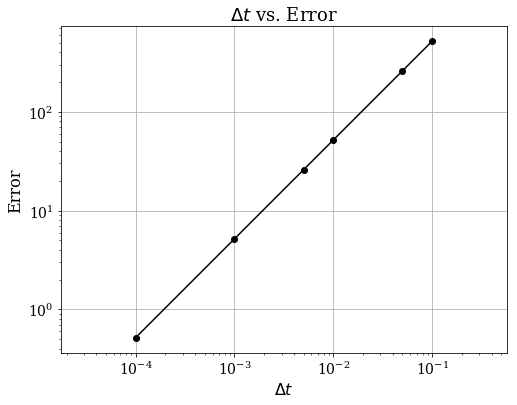

In [11]:
pyplot.figure(figsize = (8, 6))
pyplot.tick_params(axis = 'both', labelsize = 14)  # tick font size
pyplot.grid(True)  # add grid lines
pyplot.title('$\Delta t$ vs. Error', fontsize = 18); # title
pyplot.xlabel('$\Delta t$', fontsize = 16)  # x-axis label
pyplot.ylabel('Error', fontsize = 16)  # y-axis label
pyplot.loglog(dt_values, error_values, 'ko-')  #creates a plot with a log-log scale
pyplot.axis('equal');  # make axes scale equally


Convergent - the error should get smaller as $\Delta t$ gets smaller

From the plot, as $\Delta t$ shrinks (towards the left). the error gets smaller and smaller.